In [1]:
import pandas as pd
# 加载数据集
df_loan1 = pd.read_csv("/Users/mxfmeng/PycharmProjects/GraduationDesign/dataset/loan_new_3_1.csv")
df_loan2 = pd.read_csv("/Users/mxfmeng/PycharmProjects/GraduationDesign/dataset/loan_new_3_2.csv")
df_loan1

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,total_pymnt,total_rec_late_fee,last_pymnt_amnt,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,label
0,27050.0,0,10.99,885.46,4,12,3,55000.0,2,Current,...,61.2,27.0,21251.04,0.0,885.46,0,0.0,0.0,114834.0,1
1,9750.0,0,13.98,333.14,3,2,1,26000.0,0,Current,...,52.8,28.0,7994.83,0.0,333.14,0,0.0,0.0,14123.0,1
2,12000.0,0,6.62,368.45,5,12,2,105000.0,0,Current,...,21.6,22.0,8842.80,0.0,368.45,0,0.0,0.0,267646.0,1
3,12000.0,0,13.53,407.40,4,12,1,40000.0,1,Fully Paid,...,68.8,32.0,13359.77,0.0,119.17,0,0.0,15386.0,13605.0,0
4,15000.0,0,8.90,476.30,5,3,2,63000.0,0,Current,...,74.2,29.0,11431.20,0.0,476.30,0,0.0,1514.0,272492.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816717,10000.0,0,11.99,332.10,4,9,1,31000.0,2,Current,...,82.1,15.0,3971.88,0.0,332.10,0,0.0,0.0,25274.0,1
816718,24000.0,0,11.99,797.03,4,12,2,79000.0,2,Current,...,84.5,23.0,9532.39,0.0,797.03,0,0.0,0.0,140285.0,1
816719,13000.0,1,15.99,316.07,2,6,1,35000.0,2,Current,...,61.3,22.0,3769.74,0.0,316.07,0,0.0,0.0,34178.0,1
816720,12000.0,1,19.99,317.86,1,2,1,64400.0,1,Current,...,30.6,20.0,3787.67,0.0,317.86,0,0.0,0.0,58418.0,1


# 1 未删除离群点结果

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_loan1.drop(columns=["loan_status", "label"])
y = df_loan1[["label"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135223)

In [2]:
rf1 = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    random_state=135223,
    n_jobs=-1,
    warm_start=False,
    class_weight="balanced"
)
rf1.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       n_jobs=-1, random_state=135223)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     32215
           1       0.94      0.57      0.71    119791
           2       0.02      0.12      0.04      1973
           3       0.13      0.71      0.22      9366

    accuracy                           0.63    163345
   macro avg       0.51      0.57      0.47    163345
weighted avg       0.88      0.63      0.71    163345



# 2 删除离群点结果

In [35]:
X = df_loan2.drop(columns=["loan_status", "label"])
y = df_loan2[["label"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135223)

In [9]:
rf2 = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    warm_start=False,
    class_weight="balanced"
)
RandomForestClassifier()
rf2.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       n_jobs=-1, random_state=135223)

In [36]:
print(classification_report(y_test, rf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.91      0.46      2867
           1       0.97      0.47      0.63     54114
           2       0.01      0.14      0.03       751
           3       0.15      0.68      0.25      4468

    accuracy                           0.50     62200
   macro avg       0.36      0.55      0.34     62200
weighted avg       0.87      0.50      0.59     62200



In [24]:
df_res1 = pd.DataFrame()
df_res1['predict'] = rf1.predict(X_test)
df_res1['correct'] = y_test.values
df_res1['result'] = df_res1.apply(lambda row: 1 if row['predict'] == row['correct'] else 0,axis=1)

,predict,correct,result
0,3,1,0
1,1,0,0
2,1,1,1
3,3,3,1
4,1,1,1
...,...,...,...
62195,1,1,1
62196,3,1,0
62197,3,1,0
62198,1,1,1


In [22]:
y_test

,label
26567,1
51324,0
176172,1
128576,3
27256,1
...,...
8228,1
298947,1
86830,1
301967,1


In [17]:
X_test

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_bal,revol_util,total_acc,total_pymnt,total_rec_late_fee,last_pymnt_amnt,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
26567,18000.0,1,15.88,436.58,3,8,3,40000.0,2,2,...,16360.0,72.1,30.0,13085.85000,0.0,436.58,0,0.0,0.0,27002.0
51324,16100.0,0,11.14,528.17,4,12,2,75000.0,0,2,...,9737.0,63.6,24.0,19013.67708,0.0,528.07,0,0.0,0.0,74417.0
176172,24000.0,0,7.26,743.91,5,12,1,109000.0,2,2,...,39242.0,47.7,21.0,1541.06000,0.0,743.91,0,0.0,0.0,58309.0
128576,24300.0,1,23.40,690.63,1,3,2,80000.0,1,2,...,30595.0,95.9,16.0,8826.62000,0.0,690.63,0,0.0,0.0,288328.0
27256,16800.0,1,12.12,374.73,4,12,2,67500.0,2,1,...,38007.0,52.7,21.0,11230.21000,0.0,374.73,0,0.0,0.0,283446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,15000.0,0,6.62,460.56,5,6,1,60000.0,1,2,...,15628.0,28.2,29.0,11974.56000,0.0,460.56,0,0.0,0.0,36737.0
298947,12500.0,1,16.49,307.24,2,2,1,28600.0,1,2,...,15454.0,78.8,10.0,3368.19000,0.0,307.24,0,0.0,0.0,29027.0
86830,10000.0,1,22.15,277.05,1,8,1,27500.0,1,2,...,8469.0,81.4,17.0,4709.85000,0.0,277.05,0,0.0,0.0,20018.0
301967,12000.0,0,12.39,400.82,3,2,1,32000.0,0,1,...,6664.0,85.4,6.0,4789.19000,0.0,400.82,0,0.0,0.0,19314.0


[0.04279098 0.05207746 0.04959447 0.04083218 0.05299975 0.00383931
 0.006872   0.00484352 0.01428767 0.00514754 0.00328596 0.00437174
 0.00393341 0.00340172 0.00910383 0.00392896 0.00341098 0.00386445
 0.04896583 0.06674714 0.5627232  0.00148297 0.0033472  0.00467442
 0.00347321]


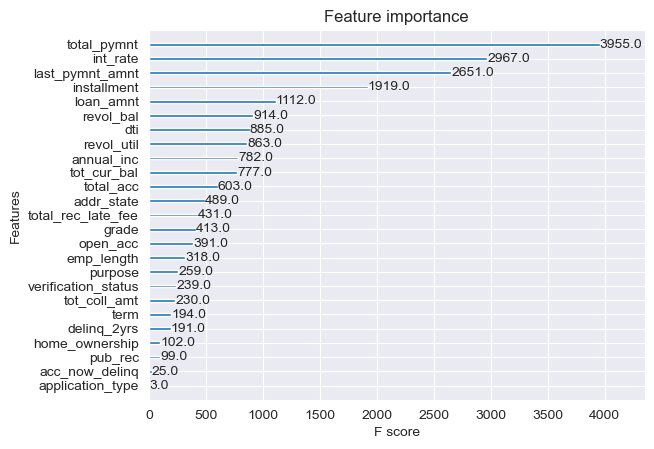

In [30]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.datasets import load_iris
from xgboost import plot_importance


# split data into X and y
xgbX = df_loan1.drop(columns=["loan_status", "label"])
xgbY = df_loan1[["label"]]
# fit model no training data
model = XGBClassifier()
model.fit(xgbX, xgbY)
# feature importance
print(model.feature_importances_)
# plot feature importance

plot_importance(model)
pyplot.show()
